# Managerial insight

In [1]:
import ast

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import gridspec
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['legend.fontsize'] = 12

In [3]:
pd.set_option('display.max_rows', None)  # display all rows.
pd.set_option('display.float_format', '{:.2f}'.format)  # two decimals.

plt.style.use('grayscale')

%matplotlib inline

In [4]:
def get_cached_data(method, num_exps):
    data = []

    for experiment in range(1, num_exps + 1):
        df = pd.read_csv(f"cache/{experiment}-{method}.csv")
        df["experiment"] = experiment

        data.append(df)

    return pd.concat(data, ignore_index=True).set_index(["experiment", "instance"])

In [5]:
experiments = pd.read_csv("experiments/experiments.csv", index_col="index").rename_axis(index="experiment")
experiments.head()

,learners,instances,penalty,min_batch,max_batch,progress,preferences,qualifications,split,courses,modules
experiment,,,,,,,,,,,
1,800,1,0.50,5,30,0,2,"(1, 0, 0)",True,"[(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...",48
2,1200,1,0.50,5,30,0,2,"(1, 0, 0)",True,"[(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...",48
3,1600,1,0.50,5,30,0,2,"(1, 0, 0)",True,"[(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...",48
4,800,1,0.75,5,30,0,2,"(1, 0, 0)",True,"[(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...",48
5,1200,1,0.75,5,30,0,2,"(1, 0, 0)",True,"[(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...",48


In [6]:
ilp = get_cached_data("ilp", 144)
ilp.head()

objective                          bounds  iterations  \
experiment instance                                                          
1          1           4739.50            [4739.502, 4739.502]          56   
           2           4733.91   [4733.912, 4733.933545454547]          67   
           3           4773.89  [4773.8855, 4774.334687499997]          34   
           4           4876.25     [4876.25, 4876.40977777778]          39   
           5           4734.33          [4734.3285, 4734.3285]          42   

                     run-time (wall)  instruction (# learners)  \
experiment instance                                              
1          1                   28.14                       786   
           2                   30.76                       787   
           3                   25.82                       785   
           4                   39.45                       791   
           5                   24.99                       787   

                     self-study (# learners)  activities (#)  \
experiment instance                                            
1          1                              14              70   
           2                              13              66   
           3                              15              68   
           4                               9              65   
           5                              13              66   

                                            instruction activity sizes  \
experiment instance                                                      
1          1         [14, 12, 5, 11, 16, 7, 7, 11, 12, 13, 12, 5, 9...   
           2         [12, 13, 5, 12, 5, 16, 16, 14, 13, 11, 11, 16,...   
           3         [14, 15, 12, 10, 7, 14, 5, 14, 15, 5, 7, 11, 5...   
           4         [15, 13, 5, 10, 11, 16, 6, 7, 8, 14, 16, 9, 12...   
           5         [9, 14, 11, 10, 15, 10, 14, 13, 13, 12, 14, 11...   

                    self-study activity sizes  gap (10 min)  
experiment instance                                          
1          1                             [14]          0.00  
           2                             [13]          0.00  
           3                             [15]          0.01  
           4                              [9]          0.00  
           5                             [13]          0.00

## Experimental results

In [7]:
width = 0.85
repeat = 2

In [8]:
data = ilp.join(experiments)
data["self-study (% learners)"] = data["self-study (# learners)"] 
data.loc[data.learners == 800, "self-study (% learners)"] /= 8
data.loc[data.learners == 1200, "self-study (% learners)"] /= 12
data.loc[data.learners == 1600, "self-study (% learners)"] /= 16

data.head()

objective                          bounds  iterations  \
experiment instance                                                          
1          1           4739.50            [4739.502, 4739.502]          56   
           2           4733.91   [4733.912, 4733.933545454547]          67   
           3           4773.89  [4773.8855, 4774.334687499997]          34   
           4           4876.25     [4876.25, 4876.40977777778]          39   
           5           4734.33          [4734.3285, 4734.3285]          42   

                     run-time (wall)  instruction (# learners)  \
experiment instance                                              
1          1                   28.14                       786   
           2                   30.76                       787   
           3                   25.82                       785   
           4                   39.45                       791   
           5                   24.99                       787   

                     self-study (# learners)  activities (#)  \
experiment instance                                            
1          1                              14              70   
           2                              13              66   
           3                              15              68   
           4                               9              65   
           5                              13              66   

                                            instruction activity sizes  \
experiment instance                                                      
1          1         [14, 12, 5, 11, 16, 7, 7, 11, 12, 13, 12, 5, 9...   
           2         [12, 13, 5, 12, 5, 16, 16, 14, 13, 11, 11, 16,...   
           3         [14, 15, 12, 10, 7, 14, 5, 14, 15, 5, 7, 11, 5...   
           4         [15, 13, 5, 10, 11, 16, 6, 7, 8, 14, 16, 9, 12...   
           5         [9, 14, 11, 10, 15, 10, 14, 13, 13, 12, 14, 11...   

                    self-study activity sizes  gap (10 min)  ...  penalty  \
experiment instance                                          ...            
1          1                             [14]          0.00  ...     0.50   
           2                             [13]          0.00  ...     0.50   
           3                             [15]          0.01  ...     0.50   
           4                              [9]          0.00  ...     0.50   
           5                             [13]          0.00  ...     0.50   

                     min_batch  max_batch  progress  preferences  \
experiment instance                                                
1          1                 5         30         0            2   
           2                 5         30         0            2   
           3                 5         30         0            2   
           4                 5         30         0            2   
           5                 5         30         0            2   

                     qualifications  split  \
experiment instance                          
1          1              (1, 0, 0)   True   
           2              (1, 0, 0)   True   
           3              (1, 0, 0)   True   
           4              (1, 0, 0)   True   
           5              (1, 0, 0)   True   

                                                               courses  \
experiment instance                                                      
1          1         [(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...   
           2         [(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...   
           3         [(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...   
           4         [(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...   
           5         [(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...   

                     modules self-study (% learners)  
experiment instance                                   
1          1              48                    1.75  
           2       

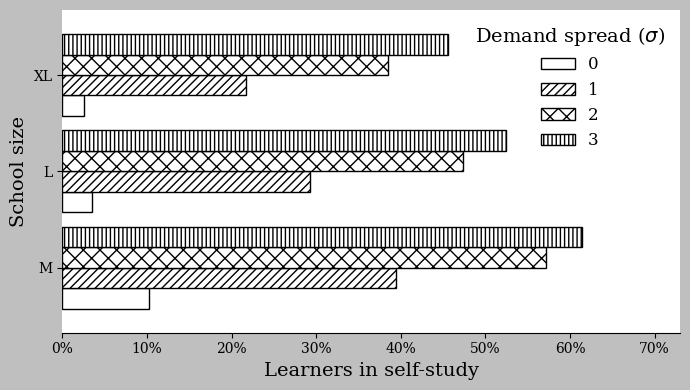

In [9]:
grouped = data.groupby(["learners", "progress"])
ax = grouped["self-study (% learners)"].mean().unstack(1).plot.barh(yticks=[0, 1, 2, 3],
                                                                    figsize=(7, 4), 
                                                                    width=width,
                                                                    edgecolor='black',
                                                                    facecolor='white')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax.set_xlabel("Learners in self-study")
ax.set_ylabel("School size")
ax.set_yticklabels(["M", "L", "XL"])

for spine in ['right', 'left', 'top']:
    ax.spines[spine].set_visible(False)

for bar, hatch in zip(ax.patches, ['', '', '', '//', '//', '//', 'x', 'x', 'x', '||', '||', '||']):
    bar.set_hatch(hatch * repeat)

ax.legend(title="Demand spread ($\\sigma$)", frameon=False)
ax.set_xlim([0, 73])

plt.tight_layout()
plt.savefig("out/progress.pdf", bbox_inches='tight');

In [10]:
print(grouped["self-study (% learners)"].mean())
print(grouped["self-study (# learners)"].mean())

learners  progress
800       0          10.20
          1          39.45
          2          57.14
          3          61.41
1200      0           3.46
          1          29.21
          2          47.37
          3          52.43
1600      0           2.52
          1          21.74
          2          38.49
          3          45.57
Name: self-study (% learners), dtype: float64
learners  progress
800       0           81.63
          1          315.57
          2          457.15
          3          491.27
1200      0           41.54
          1          350.56
          2          568.41
          3          629.17
1600      0           40.33
          1          347.80
          2          615.79
          3          729.06
Name: self-study (# learners), dtype: float64


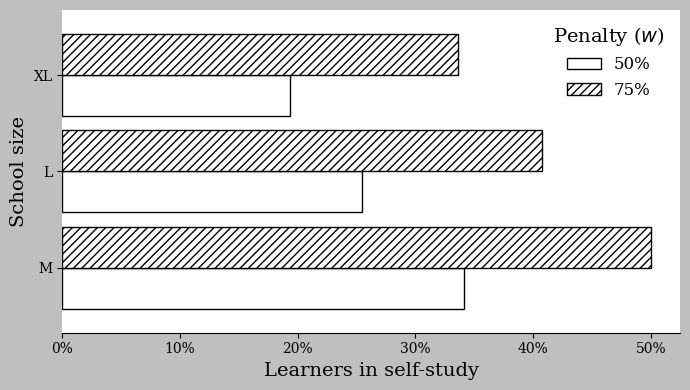

In [11]:
grouped = data.groupby(["learners", "penalty"])
ax = grouped["self-study (% learners)"].mean().unstack(1).plot.barh(figsize=(7, 4), 
                                                                    width=width,
                                                                    edgecolor='black',
                                                                    facecolor='white')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax.set_xlabel("Learners in self-study")
ax.set_ylabel("School size")
ax.set_yticklabels(["M", "L", "XL"])

for spine in ['right', 'left', 'top']:
    ax.spines[spine].set_visible(False)

for bar, hatch in zip(ax.patches, ['', '', '', '//', r'//', r'//']):
    bar.set_hatch(hatch * repeat)

ax.legend(["50%", "75%"], title="Penalty ($w$)", frameon=False)

plt.tight_layout()
plt.savefig("out/penalty.pdf", bbox_inches='tight');

In [12]:
print(grouped["self-study (% learners)"].mean())
print(grouped["self-study (# learners)"].mean())

learners  penalty
800       0.50      34.09
          0.75      49.99
1200      0.50      25.44
          0.75      40.78
1600      0.50      19.35
          0.75      33.64
Name: self-study (% learners), dtype: float64
learners  penalty
800       0.50      272.75
          0.75      399.90
1200      0.50      305.27
          0.75      489.32
1600      0.50      309.56
          0.75      538.21
Name: self-study (# learners), dtype: float64


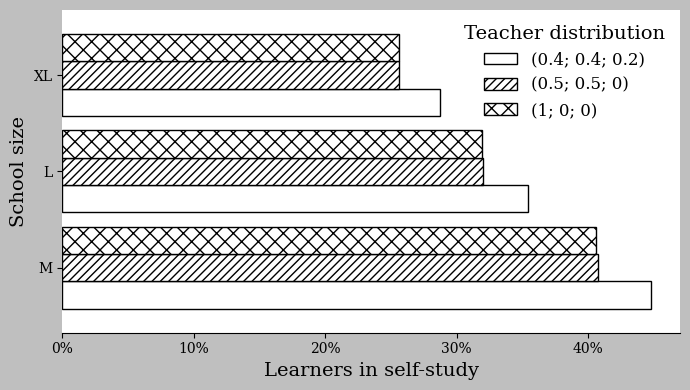

In [13]:
grouped = data.groupby(["learners", "qualifications"])
ax = grouped["self-study (% learners)"].mean().unstack(1).plot.barh(figsize=(7, 4),
                                                                    width=width,
                                                                    edgecolor='black',
                                                                    facecolor='white')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax.set_xlabel("Learners in self-study")
ax.set_ylabel("School size")
ax.set_yticklabels(["M", "L", "XL"])

for spine in ['right', 'left', 'top']:
    ax.spines[spine].set_visible(False)

    
for bar, hatch in zip(ax.patches, ['', '', '', '//', '//', '//', 'x', 'x', 'x']):
    bar.set_hatch(hatch * repeat)

ax.legend(["(0.4; 0.4; 0.2)", "(0.5; 0.5; 0)", "(1; 0; 0)"], title="Teacher distribution", frameon=False)

plt.tight_layout()
plt.savefig("out/teacher_distribution.pdf", bbox_inches='tight');

In [14]:
print(grouped["self-study (% learners)"].mean())
print(grouped["self-study (# learners)"].mean())

learners  qualifications 
800       (0.4, 0.4, 0.2)   44.76
          (0.5, 0.5, 0)     40.75
          (1, 0, 0)         40.58
1200      (0.4, 0.4, 0.2)   35.40
          (0.5, 0.5, 0)     32.00
          (1, 0, 0)         31.94
1600      (0.4, 0.4, 0.2)   28.72
          (0.5, 0.5, 0)     25.62
          (1, 0, 0)         25.61
Name: self-study (% learners), dtype: float64
learners  qualifications 
800       (0.4, 0.4, 0.2)   358.09
          (0.5, 0.5, 0)     326.03
          (1, 0, 0)         324.68
1200      (0.4, 0.4, 0.2)   424.76
          (0.5, 0.5, 0)     384.00
          (1, 0, 0)         383.23
1600      (0.4, 0.4, 0.2)   459.56
          (0.5, 0.5, 0)     409.92
          (1, 0, 0)         409.70
Name: self-study (# learners), dtype: float64


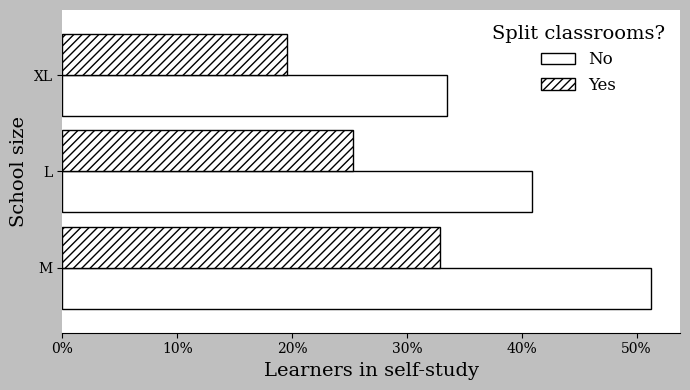

In [15]:
grouped = data.groupby(["learners", "split"])
ax = grouped["self-study (% learners)"].mean().unstack(1).plot.barh(figsize=(7, 4),
                                                                    width=width,
                                                                    edgecolor='black',
                                                                    facecolor='white')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax.set_xlabel("Learners in self-study")
ax.set_ylabel("School size")
ax.set_yticklabels(["M", "L", "XL"])

for spine in ['right', 'left', 'top']:
    ax.spines[spine].set_visible(False)
    
for bar, hatch in zip(ax.patches, ['', '', '', '//', '//', '//']):
    bar.set_hatch(hatch * repeat)

ax.legend(["No", "Yes"], title="Split classrooms?", frameon=False)

plt.tight_layout()
plt.savefig("out/split_classroom.pdf", bbox_inches='tight');

In [16]:
print(grouped["self-study (% learners)"].mean())
print(grouped["self-study (# learners)"].mean())

learners  split
800       False   51.23
          True    32.86
1200      False   40.92
          True    25.29
1600      False   33.50
          True    19.55
Name: self-study (% learners), dtype: float64
learners  split
800       False   409.80
          True    262.87
1200      False   491.07
          True    303.52
1600      False   536.01
          True    312.86
Name: self-study (# learners), dtype: float64


## Activity sizes by demand spread

In [17]:
data["intr_list"] = data["instruction activity sizes"].apply(ast.literal_eval)

Progress 0; pct above split: 73.22%
Progress 1; pct above split: 20.11%
Progress 2; pct above split: 6.03%
Progress 3; pct above split: 2.49%


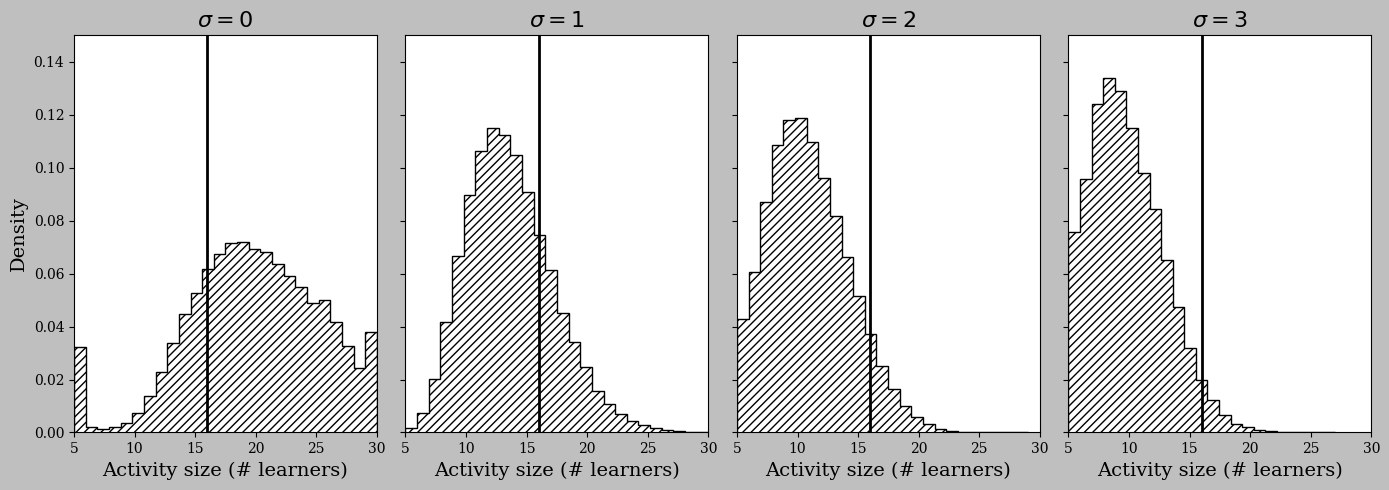

In [18]:
_, axes = plt.subplots(1, 4, figsize=(14, 5), sharey=True)

for ax, sig in zip(axes, [0, 1, 2, 3]):
    items = pd.Series(sum(data[(~data.split) & (data.progress == sig)]["intr_list"], []))

    ax.set_ylim([0, 0.15])
    ax.set_xlim([5, 30])
    n_bins, bins, patches = ax.hist(items, len(items.unique()), density=True, histtype='step', linewidth=1, facecolor='white', 
                   hatch='////', edgecolor='black',fill=True)

    print(f"Progress {sig}; pct above split: {100 * items[items > 16].count() / len(items):.2f}%")

    ax.vlines(16, 0, 1, linewidth=2, zorder=10)

    if ax is axes[0]:
        ax.set_ylabel("Density")
    
    ax.set_title(f"$\\sigma = {sig}$")
    ax.set_xlabel("Activity size (# learners)")

plt.tight_layout()
plt.savefig("out/activity_sizes.pdf", bbox_inches='tight');

## Varying $q$